# TensorFlow로 ANN 시작하기

Sequential 객체에다가 레이어를 add해준다(Dense)  
이후 compile, fitting을 진행하면 되는데,  
범주형인 경우 OHE 필요

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import mse

tf.random.set_seed(1234) #random seed 설정


In [ ]:
# 연습용 데이터
x = np.array([[0,0],[1,0],[0,1],[1,1]])
y = np.array([[0],[1],[1],[1]])

In [ ]:
# 인공신경망 모형 구성(퍼셉트론)
model = Sequential()
model.add(Dense(3, input_shape = (2, ), activation = 'linear')) #
model.add(Dense(1, activation = 'linear')) #
#모형 컴파일
model.compile(optimizer = 'SGD', loss = mse, metrics = ['acc']) #평가지표 설정
#모형 학습 및 가중치 확인
model.fit(x,y,epochs = 10)
model.get_weights()

Epoch 1/10
1/1 [==============================] - 1s 727ms/step - loss: 0.3049 - acc: 0.5000
Epoch 2/10
1/1 [==============================] - 0s 16ms/step - loss: 0.2735 - acc: 0.5000
Epoch 3/10
1/1 [==============================] - 0s 12ms/step - loss: 0.2461 - acc: 0.5000
Epoch 4/10
1/1 [==============================] - 0s 15ms/step - loss: 0.2223 - acc: 0.5000
Epoch 5/10
1/1 [==============================] - 0s 13ms/step - loss: 0.2016 - acc: 0.5000
Epoch 6/10
1/1 [==============================] - 0s 13ms/step - loss: 0.1837 - acc: 0.7500
Epoch 7/10
1/1 [==============================] - 0s 16ms/step - loss: 0.1681 - acc: 0.7500
Epoch 8/10
1/1 [==============================] - 0s 17ms/step - loss: 0.1546 - acc: 0.7500
Epoch 9/10
1/1 [==============================] - 0s 11ms/step - loss: 0.1428 - acc: 0.7500
Epoch 10/10
1/1 [==============================] - 0s 11ms/step - loss: 0.1327 - acc: 0.7500


[array([[-0.4834229 ,  0.02008832, -0.31053188],
        [ 0.2915391 ,  0.28329995,  1.0681624 ]], dtype=float32),
 array([-0.05197674,  0.05901272,  0.02674221], dtype=float32),
 array([[-0.7737084 ],
        [ 0.87714547],
        [ 0.4085653 ]], dtype=float32),
 array([0.0678226], dtype=float32)]

In [ ]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier( hidden_layer_sizes=(3,1) )
model.fit( x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1098: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(3, 1))

- 위에 있는 예제를 변형하셔서
- 은닉층 2개인 ANN을 만드세요.
- 은닉층1: 노드3,
- 은닉층2: 노드1

- Activation Function: Sigmoid VS ReLU VS TanH VS Step

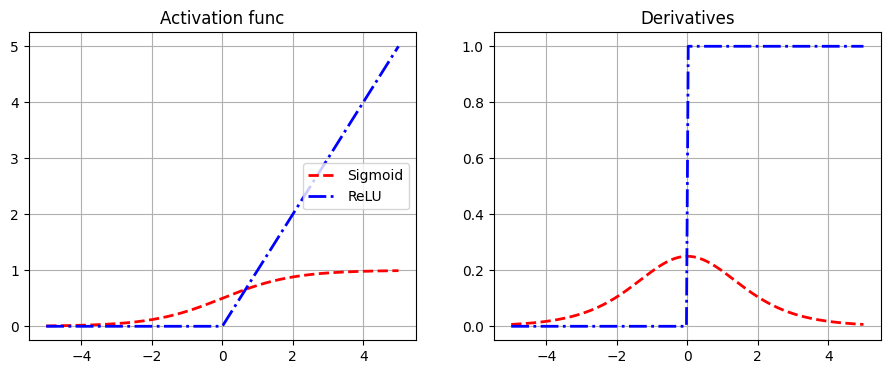

In [ ]:

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

#함수 미분
def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))
plt.subplot(121)
plt.plot(z, sigmoid(z), "r--", linewidth=2, label="Sigmoid")
plt.plot(z, relu(z), "b-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=10)
plt.title("Activation func")

plt.subplot(122)
#plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
#plt.plot(0, 0, "ro", markersize=5)
#plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "r--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(relu, z), "b-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.title("Derivatives")
plt.show()


# 학습율

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 32)                96        
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
1/1 [==============================] - 1s 868ms/step - loss: 0.2567 - acc: 0.5000
Epoch 2/50
1/1 [==============================] - 0s 25ms/step - loss: 0.2562 - acc: 0.5000
Epoch 3/50
1/1 [==============================] - 0s 13ms/step - loss: 0.2555 - acc: 0.5000
Epoch 4/50
1/1 [==============================] - 0s 16ms/step - loss: 0.2549 - acc: 0.5000
Epoch 5/50
1/1 [==============================] - 0s 14ms/step - loss: 0.2544 - acc

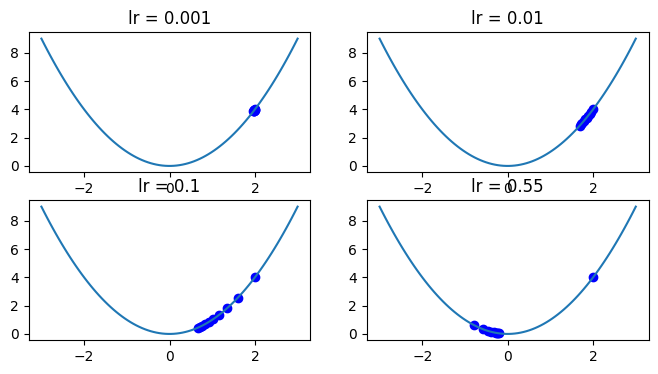

In [ ]:
tf.random.set_seed(1234)

# XOR gate를 나타낸 X, Y
x = np.array([[0,0],[1,0],[0,1],[1,1]])
y = np.array([[0],[1],[1],[0]])

#모형 구성
model = Sequential()
model.add(Dense(32, input_shape = (2, ), activation = 'relu')) #node의 수 32
model.add(Dense(1, activation='sigmoid'))
model.summary()

#모형 컴파일
model.compile(optimizer = 'adam', loss = mse, metrics = ['acc'])

#학습
model.fit(x,y,epochs = 50)

#학습율과 경사하강
lr_list = [0.001, 0.01, 0.1, 0.55]

def get_derivative(lr_list):
  weight_prev = 2
  derivative = [weight_prev]
  y = [weight_prev ** 2] # 손실 함수 y = x^2
  for i in range(1,10):
    dev_value = weight_prev **2 #미분값
    #weight update
    weight_new = weight_prev - lr * dev_value
    weight_prev = weight_new
    derivative.append(weight_prev) #weight
    y.append(weight_prev ** 2) #loss
  return derivative, y

x = np.linspace(-3,3,90)
x_square = [i**2 for i in x]

#결과 비교
fig = plt.figure(figsize=(8, 4))

for i,lr in enumerate(lr_list):
  derivative, y = get_derivative(lr)
  ax = fig.add_subplot(2, 2, i+1)
  ax.scatter(derivative, y, color = 'blue')
  ax.plot(x, x_square)
  ax.title.set_text('lr = '+str(lr))

plt.show()


#연습 1: creditset.csv에 DNN 적용, MLPClassifier와 비교

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.losses import mse

csv_data = pd.read_csv("creditset.csv")
X = csv_data.iloc[:, 1:4 ]
y  = csv_data.iloc[:, 5 ]


In [ ]:
#Partitioning
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42 )
scaler = preprocessing.MinMaxScaler()
X_train = scaler.fit_transform( X_train)
X_test  = scaler.fit_transform( X_test  )

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(6,3))
mlp.fit(X_train,y_train)
predictions = mlp.predict(X_test)

np.mean( predictions == y_test )

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9383333333333334

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print( confusion_matrix(y_test,predictions) )
print('\n', classification_report(y_test,predictions) )

[[495  13]
 [ 24  68]]

               precision    recall  f1-score   support

           0       0.95      0.97      0.96       508
           1       0.84      0.74      0.79        92

    accuracy                           0.94       600
   macro avg       0.90      0.86      0.88       600
weighted avg       0.94      0.94      0.94       600



In [ ]:
#DNN
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
np.argmax(y_test, axis = -1)

array([1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,

In [ ]:
#모형 구성
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(6, activation = 'relu', input_shape = (3, ) ) ) # 은닉층1-입력:3, 출력 6를 표시
model.add(Dense(3, activation = 'relu' ) ) # 은닉층2-입력:6, 출력 3를 표시
model.add(Dense(2, activation = 'softmax'))  # 은닉층3-출력:2를 표시

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])# 모형 컴파일

# 학습
history = model.fit(X_train, y_train, epochs = 20, batch_size = 100)
history.history.keys()


Epoch 1/20
14/14 [==============================] - 1s 2ms/step - loss: 0.7000 - acc: 0.6279
Epoch 2/20
14/14 [==============================] - 0s 2ms/step - loss: 0.6840 - acc: 0.7714
Epoch 3/20
14/14 [==============================] - 0s 3ms/step - loss: 0.6712 - acc: 0.8314
Epoch 4/20
14/14 [==============================] - 0s 2ms/step - loss: 0.6607 - acc: 0.8564
Epoch 5/20
14/14 [==============================] - 0s 2ms/step - loss: 0.6510 - acc: 0.8636
Epoch 6/20
14/14 [==============================] - 0s 3ms/step - loss: 0.6419 - acc: 0.8636
Epoch 7/20
14/14 [==============================] - 0s 3ms/step - loss: 0.6332 - acc: 0.8636
Epoch 8/20
14/14 [==============================] - 0s 3ms/step - loss: 0.6250 - acc: 0.8636
Epoch 9/20
14/14 [==============================] - 0s 3ms/step - loss: 0.6169 - acc: 0.8636
Epoch 10/20
14/14 [==============================] - 0s 3ms/step - loss: 0.6090 - acc: 0.8636
Epoch 11/20
14/14 [==============================] - 0s 3ms/step - lo

dict_keys(['loss', 'acc'])

In [ ]:
# 모형 평가-train, test
model.evaluate(X_test, y_test)
results = model.predict(X_test)
print(results.shape)

#confusion matrix: skleanr.metrics의 기능
from sklearn.metrics import classification_report, confusion_matrix
print('\n', classification_report(np.argmax(y_test, axis = -1), np.argmax(results, axis = -1)))

19/19 [==============================] - 0s 2ms/step
(600, 2)

               precision    recall  f1-score   support

           0       0.85      1.00      0.92       508
           1       0.00      0.00      0.00        92

    accuracy                           0.85       600
   macro avg       0.42      0.50      0.46       600
weighted avg       0.72      0.85      0.78       600



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- creditset.csv 에 대해서 tensorflow로 ANN모델링하세요.
- 000000000 성능을 개선해보세요~
- 4:25까지 해보세요

#연습 2: 반도체 제조 data_semi.csv에 DNN 적용, ML과 비교

- sklearn

In [ ]:
import pandas as pd
import numpy as np
csv_data = pd.read_csv("data_semi.csv")
csv_data.shape

(1567, 49)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

X = csv_data.iloc[:, 0:48 ]   #모든행, 1열~48열까지
y = csv_data.iloc[:, 48 ]    #모든 행, 49열 인덱싱

#Partitioning
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42 )
scaler = preprocessing.MinMaxScaler()
X_train = scaler.fit_transform( X_train)
X_test  = scaler.fit_transform( X_test  )

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

#NB
clf = MultinomialNB().fit(X_train, y_train)
predicted = clf.predict(X_test)
print('NB', np.mean(predicted == y_test))

#DT
dt1 = DecisionTreeClassifier().fit(X_train, y_train)
pred = dt1.predict( X_test)
print('DT', np.mean( pred == y_test ))

#RF
rf = RandomForestClassifier(n_estimators=300, random_state=42).fit(X_train, y_train)
predicted = rf.predict(X_test)
print('RF', np.mean( predicted == y_test ))

#KNN
knn = KNeighborsClassifier().fit(X_train, y_train)  #k=5
predicted = knn.predict(X_test)
print('KNN', np.mean( predicted == y_test ))

#SVM
svm = SVC().fit(X_train, y_train)
predicted = svm.predict(X_test)
print('SVM', np.mean( predicted == y_test ))

#ANN
mlp = MLPClassifier(hidden_layer_sizes=(24,12,6)).fit(X_train,y_train)
predictions = mlp.predict(X_test)
print('ANN',np.mean( predictions == y_test ))

NB 0.9320594479830149
DT 0.6475583864118896
RF 0.9299363057324841
KNN 0.9320594479830149
SVM 0.9341825902335457
ANN 0.9320594479830149


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


- tensorflow

In [ ]:
#DNN
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#모형 구성
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
model.add(Dense(24, activation = 'relu', input_shape = (48, ) ) )
model.add(Dense(12, activation = 'relu' ) )
model.add(Dense(6, activation = 'relu' ) )
model.add(Dense(2, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])# 모형 컴파일

# 학습
history = model.fit(X_train, y_train, epochs = 20, batch_size = 100)
history.history.keys()

# 모형 평가-train, test
model.evaluate(X_test, y_test)

results = model.predict(X_test)
print(results.shape)

#confusion matrix: skleanr.metrics의 기능
from sklearn.metrics import classification_report, confusion_matrix
print('\n', classification_report(np.argmax(y_test, axis = -1), np.argmax(results, axis = -1)))

Epoch 1/20
11/11 [==============================] - 1s 3ms/step - loss: 0.3764 - acc: 0.9334
Epoch 2/20
11/11 [==============================] - 0s 4ms/step - loss: 0.2737 - acc: 0.9334
Epoch 3/20
11/11 [==============================] - 0s 5ms/step - loss: 0.2466 - acc: 0.9334
Epoch 4/20
11/11 [==============================] - 0s 4ms/step - loss: 0.2459 - acc: 0.9334
Epoch 5/20
11/11 [==============================] - 0s 3ms/step - loss: 0.2448 - acc: 0.9334
Epoch 6/20
11/11 [==============================] - 0s 4ms/step - loss: 0.2433 - acc: 0.9334
Epoch 7/20
11/11 [==============================] - 0s 3ms/step - loss: 0.2435 - acc: 0.9334
Epoch 8/20
11/11 [==============================] - 0s 3ms/step - loss: 0.2432 - acc: 0.9334
Epoch 9/20
11/11 [==============================] - 0s 3ms/step - loss: 0.2430 - acc: 0.9334
Epoch 10/20
11/11 [==============================] - 0s 4ms/step - loss: 0.2427 - acc: 0.9334
Epoch 11/20
11/11 [==============================] - 0s 3ms/step - lo

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 연습3: DNN 활용

- sp500_tm.csv 를 읽으셔서
- train, test 파티셔닝 / minmax scaling 하셔서
- y는 OHE 적용하세요
- 8-4-2 ANN를 만들어보세요
- relu, relu, softmax
- epoch 10으로 지정하세요.


In [ ]:
import pandas as pd
csv = pd.read_csv("sp500_tm.csv")
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( csv.iloc[ :, 0:3], csv.Direction,
                                                    test_size=0.3)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform( X_train)
X_test = scaler.fit_transform( X_test)
y_train = to_categorical( y_train )
y_test = to_categorical( y_test )
model = Sequential()
model.add( Dense( 8, activation="relu", input_shape=(3,)) )
model.add( Dense( 4, activation="relu") )
model.add( Dense( 2,  activation="softmax"))
model.compile( optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
model.fit( X_train, y_train, epochs=20)

Epoch 1/20
3/3 [==============================] - 1s 6ms/step - loss: 0.7048 - acc: 0.4286
Epoch 2/20
3/3 [==============================] - 0s 6ms/step - loss: 0.7014 - acc: 0.4429
Epoch 3/20
3/3 [==============================] - 0s 5ms/step - loss: 0.6988 - acc: 0.4286
Epoch 4/20
3/3 [==============================] - 0s 7ms/step - loss: 0.6960 - acc: 0.4429
Epoch 5/20
3/3 [==============================] - 0s 7ms/step - loss: 0.6937 - acc: 0.5000
Epoch 6/20
3/3 [==============================] - 0s 5ms/step - loss: 0.6921 - acc: 0.5286
Epoch 7/20
3/3 [==============================] - 0s 8ms/step - loss: 0.6903 - acc: 0.5571
Epoch 8/20
3/3 [==============================] - 0s 7ms/step - loss: 0.6889 - acc: 0.5714
Epoch 9/20
3/3 [==============================] - 0s 6ms/step - loss: 0.6873 - acc: 0.5857
Epoch 10/20
3/3 [==============================] - 0s 7ms/step - loss: 0.6862 - acc: 0.6000
Epoch 11/20
3/3 [==============================] - 0s 6ms/step - loss: 0.6853 - acc: 0.60

In [ ]:
#분류 보고서
print('\n', classification_report(np.argmax(y_test, axis = -1), np.argmax(results, axis = -1)))


ValueError: ignored

# 연습4: MNIST

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(x_train.shape, y_train.shape,x_test.shape,y_test.shape)
x_train.reshape(60000, 784).shape

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


(60000, 784)

In [ ]:

#random하게 5개 이미지 확인
sample_size = 2
random_idx = np.random.randint(60000, size = sample_size)

for idx in random_idx:
  img = x_train[idx, :]
  label = y_train[idx]
  plt.figure()
  plt.imshow(img)
  plt.title('%d-th, label: %d' %(idx, label))

In [ ]:
# 파티셔닝: 7:3
from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train, test_size = 0.3, random_state =1234)

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

num_x_train = x_train.shape[0]
num_x_val = x_val.shape[0]
num_x_test = x_test.shape[0]

(42000, 28, 28) (42000,)
(18000, 28, 28) (18000,)


In [ ]:
#min_max scaling / flattening
x_train = (x_train.reshape((num_x_train, 28*28))) / 255
x_val = (x_val.reshape((num_x_val, 28*28))) / 255
x_test = (x_test.reshape((num_x_test, 28*28)))/ 255

In [ ]:
#Y: one hot encoding
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

In [ ]:
#모형 구성
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential()
# 은닉층1-입력:784, 출력 64를 표시
model.add(Dense(64, activation = 'relu', input_shape = (784, ) ) )
# 은닉층2-입력:32를 표시
model.add(Dense(32, activation = 'relu')) #32개의 출력을 가지는 Dense층
# 은닉층3-입력:10를 표시
model.add(Dense(10, activation = 'softmax')) # 10개의 출력을 가지는 신경망

# 모형 컴파일
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])

# 학습
history = model.fit(x_train, y_train, epochs = 20,
                    batch_size = 128, validation_data = (x_val,y_val))


Epoch 1/20
329/329 [==============================] - 3s 6ms/step - loss: 0.5131 - acc: 0.8553 - val_loss: 0.2682 - val_acc: 0.9229
Epoch 2/20
329/329 [==============================] - 2s 5ms/step - loss: 0.2151 - acc: 0.9391 - val_loss: 0.2008 - val_acc: 0.9416
Epoch 3/20
329/329 [==============================] - 2s 5ms/step - loss: 0.1659 - acc: 0.9525 - val_loss: 0.1743 - val_acc: 0.9512
Epoch 4/20
329/329 [==============================] - 2s 5ms/step - loss: 0.1364 - acc: 0.9613 - val_loss: 0.1717 - val_acc: 0.9487
Epoch 5/20
329/329 [==============================] - 3s 8ms/step - loss: 0.1171 - acc: 0.9660 - val_loss: 0.1410 - val_acc: 0.9591
Epoch 6/20
329/329 [==============================] - 2s 5ms/step - loss: 0.0996 - acc: 0.9709 - val_loss: 0.1301 - val_acc: 0.9627
Epoch 7/20
329/329 [==============================] - 2s 5ms/step - loss: 0.0888 - acc: 0.9744 - val_loss: 0.1199 - val_acc: 0.9648
Epoch 8/20
329/329 [==============================] - 2s 5ms/step - loss: 0.

- 현재 은닉층은 64-32-10 구성인데, 이 부분을 64-32-16-10으로 변경해보세요
- epcohs를 40으로 변경해보세요
- batch_size=256으로 지정해보세요.
-학습과정에서 오버피팅 발생하는 epoch도 찾아보세요

In [ ]:
confusion_matrix(np.argmax(y_test, axis = -1), np.argmax(results, axis = -1))

NameError: ignored

- Confusion Matrix

313/313 [==============================] - 1s 2ms/step


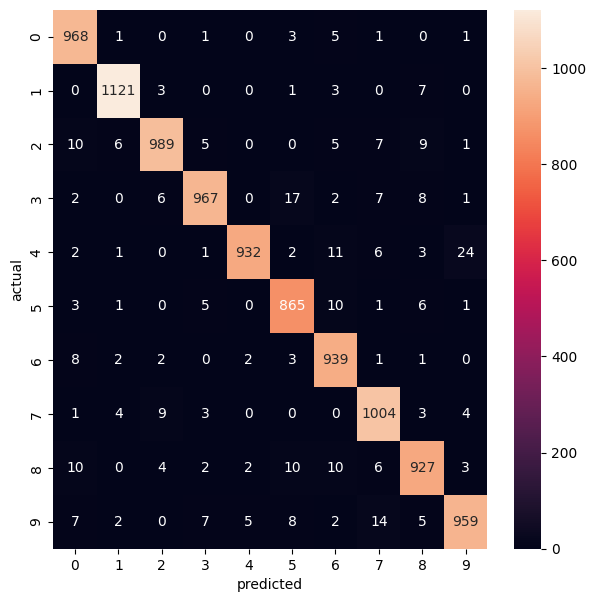


               precision    recall  f1-score   support

           0       0.96      0.99      0.97       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.96      0.97      1032
           3       0.98      0.96      0.97      1010
           4       0.99      0.95      0.97       982
           5       0.95      0.97      0.96       892
           6       0.95      0.98      0.97       958
           7       0.96      0.98      0.97      1028
           8       0.96      0.95      0.95       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
results = model.predict(x_test)
#혼동행렬을 만듬.
plt.figure(figsize = (7,7))
cm = confusion_matrix(np.argmax(y_test, axis = -1), np.argmax(results, axis = -1))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.show()

#분류 보고서
print('\n', classification_report(np.argmax(y_test, axis = -1), np.argmax(results, axis = -1)))




# 문제

In [ ]:
# creditset.csv읽어서
# Y: default10yr
# X: income, age, loan
# tensorflow, activation=relu, 마지막 은닉층은 softmax,
# scaling, OHT 모두 써보기
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.losses import mse

crd = pd.read_csv("creditset.csv")
crd.head()

y = pd.get_dummies(crd.default10yr)
X = crd[["income", "age", "loan"]]

X_s = MinMaxScaler().fit_transform(X)

X_tr, X_te, y_tr, y_te = train_test_split(X_s, y, stratify=y)

model = Sequential()
model.add(Dense(100, activation = 'relu', input_shape = (3, ) ) ) # input_shape에다가 X개수 적기
model.add(Dense(90, activation = 'relu'))
model.add(Dense(80, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(30, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))  # 마지막 은닉층

#model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])# 모형 컴파일
model.compile(optimizer = Adam(learning_rate=0.0005), loss = 'categorical_crossentropy', metrics = ['acc'])# 모형 컴파일

model.fit(X_tr, y_tr, epochs=20)


In [ ]:
crd.default10yr.value_counts()/2000
# -> 0이 너무 많아서 딱 그만큼만 잡아내는 것 같음
# 튜닝필요

from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
x_train_res, y_train_res = sm.fit_resample(X, y)


In [ ]:
# data_semi.csv 읽어서 Y: pass.fail / X: 나머지
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.losses import mse

ds = pd.read_csv("data_semi.csv")

y = pd.get_dummies(ds["Pass.Fail"])
X = ds.drop("Pass.Fail", axis=1)

X_s = MinMaxScaler().fit_transform(X)

X_tr, X_te, y_tr, y_te = train_test_split(X_s, y, stratify=y)

model = Sequential()
model.add(Dense(100, activation = 'relu', input_shape = (48, ) ) ) # input_shape에다가 X개수 적기
model.add(Dense(90, activation = 'relu'))
model.add(Dense(80, activation = 'relu'))
model.add(Dense(50, activation = 'relu'))
model.add(Dense(30, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.add(Dense(2, activation = 'softmax'))  # 마지막 은닉층

#model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])# 모형 컴파일
model.compile(optimizer = Adam(learning_rate=0.0005), loss = 'categorical_crossentropy', metrics = ['acc'])# 모형 컴파일

model.fit(X_tr, y_tr, epochs=20)

# ---------------------------------------------------

pred = model.predict(X_te)

import numpy as np
pOrgin = np.argmax(pred, axis=1) # 1차원의 원래 값으로 변경
yOrgin = np.argmax(y_te.values, axis=1) # 테스트도 원래 값으로 변경

#예측값과 원래 값을 넣어서 확인 가능
from sklearn.metrics import classification_report
print(classification_report(pOrgin, yOrgin))
# 값이 0이 97퍼 1이 나머지인데 우연찮게 0으로 다 찍었더니 나온거다 볼 수 있다.


In [ ]:
!pip install konlpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 26.0 MB/s eta 0:00:00


In [ ]:
#위의 문제 스탑워드, min_df, node수 변경해서  성능 개선

import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.losses import mse

from konlpy.tag import Okt

okt = Okt()
def token(text):
  tmp = okt.nouns(text)
  return tmp

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(tokenizer=token, stop_words=stop_words, min_df = 5)

ds = pd.read_csv("data.csv", encoding="cp949")

# 2000개로 변경
X_tr, X_te = train_test_split(ds, stratify=ds.상황, test_size=0.05)

y = pd.get_dummies(X_te["상황"])
X = tfidf.fit_transform(X_te.발화문)

#X는 DTM이니까 Array로 변경해야함.
#X_s = MinMaxScaler().fit_transform(X)
X_s = MinMaxScaler().fit_transform(X.toarray())

X_tr, X_te, y_tr, y_te = train_test_split(X_s, y, stratify=y)

model = Sequential()
model.add(Dense(X_tr.shape[1]/2, activation = 'relu', input_shape = (X_tr.shape[1], ) ) ) # input_shape에다가 X개수 적기
model.add(Dense(X_tr.shape[1]/4, activation = 'relu'))
model.add(Dense(X_tr.shape[1]/8, activation = 'relu'))
model.add(Dense(X_tr.shape[1]/16, activation = 'relu'))
model.add(Dense(X_tr.shape[1]/32, activation = 'relu'))
model.add(Dense(9, activation = 'softmax'))  # 마지막 은닉층 타겟의 범주 개수

#model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])# 모형 컴파일
model.compile(optimizer = "Adam", loss = 'categorical_crossentropy', metrics = ['acc'])# 모형 컴파일

model.fit(X_tr, y_tr, epochs=20)

# ---------------------------------------------------

pred = model.predict(X_te)

import numpy as np
pOrgin = np.argmax(pred, axis=1)
yOrgin = np.argmax(y_te.values, axis=1)

from sklearn.metrics import classification_report
print(classification_report(pOrgin, yOrgin))

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['각하', '간', '개', '거나', '거리', '걸', '겁', '것과', '견지', '결과', '결론', '고려', '곤', '곳', '공동', '관', '관계', '관련', '구체', '구토', '근거', '기대', '기점', '기준', '김', '까닭', '나머지', '남', '낫다', '낼', '년도', '논', '누가', '다시', '답', '대로', '대하', '대해', '더', '더욱이', '도달', '도착', '동시', '됏', '두번째', '뒤', '듯', '따름', '때문', '라면', '리하', '마자', '막론', '만', '만이', '만하', '말', '망정', '메', '몰랏다', '무릎', '바', '반대', '방면', '보아', '본대', '부류', '불구', '불문', '비', '비걱거리', '비교', '뿐', '사람', '상대', '생각', '서술', '수', '시오', '시작', '시초', '아래', '아무', '안', '알', '알다', '앞', '어기', '어쨋', '어찌됏', '여보', '연관', '옆', '외', '요', '우', '위', '위해', '윗', '의거', '의지', '의치', '이로', '이서', '이외', '이용', '이유

Epoch 1/20
52/52 [==============================] - 1s 3ms/step - loss: 2.1552 - acc: 0.2303
Epoch 2/20
52/52 [==============================] - 0s 3ms/step - loss: 1.8636 - acc: 0.3861
Epoch 3/20
52/52 [==============================] - 0s 3ms/step - loss: 1.3037 - acc: 0.5376
Epoch 4/20
52/52 [==============================] - 0s 3ms/step - loss: 1.0500 - acc: 0.6485
Epoch 5/20
52/52 [==============================] - 0s 3ms/step - loss: 0.9001 - acc: 0.7139
Epoch 6/20
52/52 [==============================] - 0s 3ms/step - loss: 0.7930 - acc: 0.7424
Epoch 7/20
52/52 [==============================] - 0s 3ms/step - loss: 0.7100 - acc: 0.7830
Epoch 8/20
52/52 [==============================] - 0s 3ms/step - loss: 0.6302 - acc: 0.8048
Epoch 9/20
52/52 [==============================] - 0s 3ms/step - loss: 0.5973 - acc: 0.8145
Epoch 10/20
52/52 [==============================] - 0s 3ms/step - loss: 0.5590 - acc: 0.8236
Epoch 11/20
52/52 [==============================] - 0s 3ms/step - lo

In [ ]:

for sentence in tqdm(df['news']):
    tokenized_sentence = okt.nouns(sentence)
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    dsn_token_data.append(stopwords_removed_sentence)

In [ ]:
stop_words = ['가',
'가까스로',
'가령',
'각',
'각각',
'각자',
'각종',
'갖고말하자면',
'같다',
'같이',
'개의치않고',
'거니와',
'거바',
'거의',
'것',
'것과 같이',
'것들',
'게다가',
'게우다',
'겨우',
'견지에서',
'결과에 이르다',
'결국',
'결론을 낼 수 있다',
'겸사겸사',
'고려하면',
'고로',
'곧',
'공동으로',
'과',
'과연',
'관계가 있다',
'관계없이',
'관련이 있다',
'관하여',
'관한',
'관해서는',
'구',
'구체적으로',
'구토하다',
'그',
'그들',
'그때',
'그래',
'그래도',
'그래서',
'그러나',
'그러니',
'그러니까',
'그러면',
'그러므로',
'그러한즉',
'그런 까닭에',
'그런데',
'그런즉',
'그럼',
'그럼에도 불구하고',
'그렇게 함으로써',
'그렇지',
'그렇지 않다면',
'그렇지 않으면',
'그렇지만',
'그렇지않으면',
'그리고',
'그리하여',
'그만이다',
'그에 따르는',
'그위에',
'그저',
'그중에서',
'그치지 않다',
'근거로',
'근거하여',
'기대여',
'기점으로',
'기준으로',
'기타',
'까닭으로',
'까악',
'까지',
'까지 미치다',
'까지도',
'꽈당',
'끙끙',
'끼익',
'나',
'나머지는',
'남들',
'남짓',
'너',
'너희',
'너희들',
'네',
'넷',
'년',
'논하지 않다',
'놀라다',
'누가 알겠는가',
'누구',
'다른',
'다른 방면으로',
'다만',
'다섯',
'다소',
'다수',
'다시 말하자면',
'다시말하면',
'다음',
'다음에',
'다음으로',
'단지',
'답다',
'당신',
'당장',
'대로 하다',
'대하면',
'대하여',
'대해 말하자면',
'대해서',
'댕그',
'더구나',
'더군다나',
'더라도',
'더불어',
'더욱더',
'더욱이는',
'도달하다',
'도착하다',
'동시에',
'동안',
'된바에야',
'된이상',
'두번째로',
'둘',
'둥둥',
'뒤따라',
'뒤이어',
'든간에',
'들',
'등',
'등등',
'딩동',
'따라',
'따라서',
'따위',
'따지지 않다',
'딱',
'때',
'때가 되어',
'때문에',
'또',
'또한',
'뚝뚝',
'라 해도',
'령',
'로',
'로 인하여',
'로부터',
'로써',
'륙',
'를',
'마음대로',
'마저',
'마저도',
'마치',
'막론하고',
'만 못하다',
'만약',
'만약에',
'만은 아니다',
'만이 아니다',
'만일',
'만큼',
'말하자면',
'말할것도 없고',
'매',
'매번',
'메쓰겁다',
'몇',
'모',
'모두',
'무렵',
'무릎쓰고',
'무슨',
'무엇',
'무엇때문에',
'물론',
'및',
'바꾸어말하면',
'바꾸어말하자면',
'바꾸어서 말하면',
'바꾸어서 한다면',
'바꿔 말하면',
'바로',
'바와같이',
'밖에 안된다',
'반대로',
'반대로 말하자면',
'반드시',
'버금',
'보는데서',
'보다더',
'보드득',
'본대로',
'봐',
'봐라',
'부류의 사람들',
'부터',
'불구하고',
'불문하고',
'붕붕',
'비걱거리다',
'비교적',
'비길수 없다',
'비로소',
'비록',
'비슷하다',
'비추어 보아',
'비하면',
'뿐만 아니라',
'뿐만아니라',
'뿐이다',
'삐걱',
'삐걱거리다',
'사',
'삼',
'상대적으로 말하자면',
'생각한대로',
'설령',
'설마',
'설사',
'셋',
'소생',
'소인',
'솨',
'쉿',
'습니까',
'습니다',
'시각',
'시간',
'시작하여',
'시초에',
'시키다',
'실로',
'심지어',
'아',
'아니',
'아니나다를가',
'아니라면',
'아니면',
'아니었다면',
'아래윗',
'아무거나',
'아무도',
'아야',
'아울러',
'아이',
'아이고',
'아이구',
'아이야',
'아이쿠',
'아하',
'아홉',
'안 그러면',
'않기 위하여',
'않기 위해서',
'알 수 있다',
'알았어',
'앗',
'앞에서',
'앞의것',
'야',
'약간',
'양자',
'어',
'어기여차',
'어느',
'어느 년도',
'어느것',
'어느곳',
'어느때',
'어느쪽',
'어느해',
'어디',
'어때',
'어떠한',
'어떤',
'어떤것',
'어떤것들',
'어떻게',
'어떻해',
'어이',
'어째서',
'어쨋든',
'어쩔수 없다',
'어찌',
'어찌됏든',
'어찌됏어',
'어찌하든지',
'어찌하여',
'언제',
'언젠가',
'얼마',
'얼마 안 되는 것',
'얼마간',
'얼마나',
'얼마든지',
'얼마만큼',
'얼마큼',
'엉엉',
'에',
'에 가서',
'에 달려 있다',
'에 대해',
'에 있다',
'에 한하다',
'에게',
'에서',
'여',
'여기',
'여덟',
'여러분',
'여보시오',
'여부',
'여섯',
'여전히',
'여차',
'연관되다',
'연이서',
'영',
'영차',
'옆사람',
'예',
'예를 들면',
'예를 들자면',
'예컨대',
'예하면',
'오',
'오로지',
'오르다',
'오자마자',
'오직',
'오호',
'오히려',
'와',
'와 같은 사람들',
'와르르',
'와아',
'왜',
'왜냐하면',
'외에도',
'요만큼',
'요만한 것',
'요만한걸',
'요컨대',
'우르르',
'우리',
'우리들',
'우선',
'우에 종합한것과같이',
'운운',
'월',
'위에서 서술한바와같이',
'위하여',
'위해서',
'윙윙',
'육',
'으로',
'으로 인하여',
'으로서',
'으로써',
'을',
'응',
'응당',
'의',
'의거하여',
'의지하여',
'의해',
'의해되다',
'의해서',
'이',
'이 되다',
'이 때문에',
'이 밖에',
'이 외에',
'이 정도의',
'이것',
'이곳',
'이때',
'이라면',
'이래',
'이러이러하다',
'이러한',
'이런',
'이럴정도로',
'이렇게 많은 것',
'이렇게되면',
'이렇게말하자면',
'이렇구나',
'이로 인하여',
'이르기까지',
'이리하여',
'이만큼',
'이번',
'이봐',
'이상',
'이어서',
'이었다',
'이와 같다',
'이와 같은',
'이와 반대로',
'이와같다면',
'이외에도',
'이용하여',
'이유만으로',
'이젠',
'이지만',
'이쪽',
'이천구',
'이천육',
'이천칠',
'이천팔',
'인 듯하다',
'인젠',
'일',
'일것이다',
'일곱',
'일단',
'일때',
'일반적으로',
'일지라도',
'임에 틀림없다',
'입각하여',
'입장에서',
'잇따라',
'있다',
'자',
'자기',
'자기집',
'자마자',
'자신',
'잠깐',
'잠시',
'저',
'저것',
'저것만큼',
'저기',
'저쪽',
'저희',
'전부',
'전자',
'전후',
'점에서 보아',
'정도에 이르다',
'제',
'제각기',
'제외하고',
'조금',
'조차',
'조차도',
'졸졸',
'좀',
'좋아',
'좍좍',
'주룩주룩',
'주저하지 않고',
'줄은 몰랏다',
'줄은모른다',
'중에서',
'중의하나',
'즈음하여',
'즉',
'즉시',
'지든지',
'지만',
'지말고',
'진짜로',
'쪽으로',
'차라리',
'참',
'참나',
'첫번째로',
'쳇',
'총적으로',
'총적으로 말하면',
'총적으로 보면',
'칠',
'콸콸',
'쾅쾅',
'쿵',
'타다',
'타인',
'탕탕',
'토하다',
'통하여',
'툭',
'퉤',
'틈타',
'팍',
'팔',
'퍽',
'펄렁',
'하',
'하게될것이다',
'하게하다',
'하겠는가',
'하고 있다',
'하고있었다',
'하곤하였다',
'하구나',
'하기 때문에',
'하기 위하여',
'하기는한데',
'하기만 하면',
'하기보다는',
'하기에',
'하나',
'하느니',
'하는 김에',
'하는 편이 낫다',
'하는것도',
'하는것만 못하다',
'하는것이 낫다',
'하는바',
'하더라도',
'하도다',
'하도록시키다',
'하도록하다',
'하든지',
'하려고하다',
'하마터면',
'하면 할수록',
'하면된다',
'하면서',
'하물며',
'하여금',
'하여야',
'하자마자',
'하지 않는다면',
'하지 않도록',
'하지마',
'하지마라',
'하지만',
'하하',
'한 까닭에',
'한 이유는',
'한 후',
'한다면',
'한다면 몰라도',
'한데',
'한마디',
'한적이있다',
'한켠으로는',
'한항목',
'할 따름이다',
'할 생각이다',
'할 줄 안다',
'할 지경이다',
'할 힘이 있다',
'할때',
'할만하다',
'할망정',
'할뿐',
'할수있다',
'할수있어',
'할줄알다',
'할지라도',
'할지언정',
'함께',
'해도된다',
'해도좋다',
'해봐요',
'해서는 안된다',
'해야한다',
'해요',
'했어요',
'향하다',
'향하여',
'향해서',
'허',
'허걱',
'허허',
'헉',
'헉헉',
'헐떡헐떡',
'형식으로 쓰여',
'혹시',
'혹은',
'혼자',
'훨씬',
'휘익',
'휴',
'흐흐',
'흥',
'힘입어']